#School Level Detection

### Attribute Information:
- 0 StudentID - a unique ID identifying each student

- 1 FirstName

- 2 FamilyName

- 3 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)  

- 4 sex - student's sex (binary: 'F' - female or 'M' - male)  

- 5 age - student's age (numeric: from 15 to 22)  

- 6 address - student's home address type (binary: 'U' - urban or 'R' - rural)  

- 7 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)  

- 8 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)  

- 9 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)  

- 10 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)  

- 11 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  

- 12 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  

- 13 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')  

- 14 guardian - student's guardian (nominal: 'mother', 'father' or 'other')  

- 15 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)  

- 16 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)  

- 17 failures - number of past class failures (numeric: n if 1<=n<3, else 4)  

- 18 schoolsup - extra educational support (binary: yes or no)  

- 19 famsup - family educational support (binary: yes or no)  

- 20 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)  

- 21 activities - extracurricular activities (binary: yes or no)  

- 22 nursery - attended nursery school (binary: yes or no)  

- 23 higher - wants to take higher education (binary: yes or no)  

- 24 internet - Internet access at home (binary: yes or no)  

- 25 romantic - with a romantic relationship (binary: yes or no)  

- 26 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)  

- 27 freetime - free time after school (numeric: from 1 - very low to 5 - very high)  

- 28 goout - going out with friends (numeric: from 1 - very low to 5 - very high)  

- 29 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)  

- 30 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)  

- 31 health - current health status (numeric: from 1 - very bad to 5 - very good)  

- 32 absences - number of school absences (numeric: from 0 to 93)  

- 33 FinalGrade - final grade in mathematics (numeric: from 0 to 20, output target)

## Mount drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [3]:
main_folder = "/content/drive/MyDrive/Ekinox"
data_file = os.path.join(main_folder,"student_data.csv")

In [4]:
df = pd.read_csv(data_file)
print(f"Shape of the Dataframe : {df.shape[0]} lines and {df.shape[1]} columns.")
display(df.head())

Shape of the Dataframe : 357 lines and 34 columns.


,StudentID,FirstName,FamilyName,school,sex,age,address,famsize,Pstatus,Medu,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade
0,0,Rafael,Morais,GP,F,18,U,GT3,A,4,...,no,no,4,3,4,1,1,3,6,6
1,1,Lara,Braga,GP,F,17,U,GT3,T,1,...,yes,no,5,3,3,1,1,3,4,6
2,2,Gonçalo,Azevedo,GP,F,15,U,LE3,T,1,...,yes,no,4,3,2,2,3,3,10,10
3,3,Lara,Perna,GP,F,15,U,GT3,T,4,...,yes,yes,3,2,2,1,1,5,2,15
4,4,João,Pires,GP,F,16,U,GT3,T,3,...,no,no,4,3,2,1,2,5,4,10


## EDA

### Columns

In [5]:
df.columns

Index(['StudentID', 'FirstName', 'FamilyName', 'school', 'sex', 'age',
       'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'FinalGrade'],
      dtype='object')

#### Overview

In [6]:
# info about the dataframe (type of cloumns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudentID   357 non-null    int64 
 1   FirstName   357 non-null    object
 2   FamilyName  357 non-null    object
 3   school      357 non-null    object
 4   sex         357 non-null    object
 5   age         357 non-null    int64 
 6   address     357 non-null    object
 7   famsize     357 non-null    object
 8   Pstatus     357 non-null    object
 9   Medu        357 non-null    int64 
 10  Fedu        357 non-null    int64 
 11  Mjob        357 non-null    object
 12  Fjob        357 non-null    object
 13  reason      357 non-null    object
 14  guardian    357 non-null    object
 15  traveltime  357 non-null    int64 
 16  studytime   357 non-null    int64 
 17  failures    357 non-null    int64 
 18  schoolsup   357 non-null    object
 19  famsup      357 non-null    object
 20  paid      

In [7]:
# Null Value
# df.isna().sum()

In [8]:
# Unique Values
df.nunique(axis=0)

StudentID     357
FirstName      40
FamilyName    355
school          2
sex             2
age             8
address         2
famsize         2
Pstatus         2
Medu            5
Fedu            5
Mjob            5
Fjob            5
reason          4
guardian        3
traveltime      4
studytime       4
failures        4
schoolsup       2
famsup          2
paid            2
activities      2
nursery         2
higher          2
internet        2
romantic        2
famrel          5
freetime        5
goout           5
Dalc            5
Walc            5
health          5
absences       34
FinalGrade     17
dtype: int64

In [9]:
#df.describe()

__________________  

#### EDA Conclusion
__________________

- **Null Values** : 0

- **Columns to Drop**
```
['StudentID', 'FirstName', 'FamilyName']
```

- **Categorical Features**  
```
['school', 'sex','address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
  'Mjob', 'Fjob','reason', 'guardian', 'traveltime', 'studytime',
  'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
  'internet','romantic', 'famrel', 'freetime', 'goout', 'Dalc','Walc',
  'health']
```
- **Numerical Features**  
```
['age','failures','absences']
```

- **Target**  
```
'FinalGrade'
```

Columns by Types


In [10]:
to_drop = ['StudentID', 'FirstName', 'FamilyName']

categorical = ['school', 'sex','address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
               'Mjob', 'Fjob','reason', 'guardian', 'traveltime', 'studytime',
               'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
               'internet','romantic', 'famrel', 'freetime', 'goout', 'Dalc',
               'Walc','health']

numerical = ['age','failures','absences']

target = 'FinalGrade'

In [11]:
actionable = ['school', 'studytime', 'famsup', 'paid', 'activities',
              'internet','romantic', 'freetime', 'goout', 'Dalc',
               'Walc','health']

Drop column

In [12]:
df = df.drop(to_drop, axis=1)

### Exploration 

#### Numerical Features

histogram

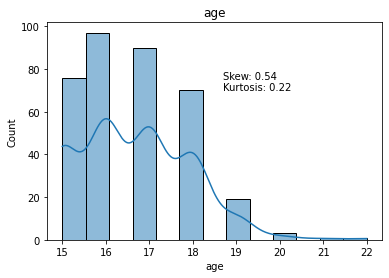

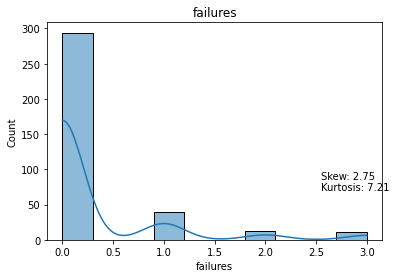

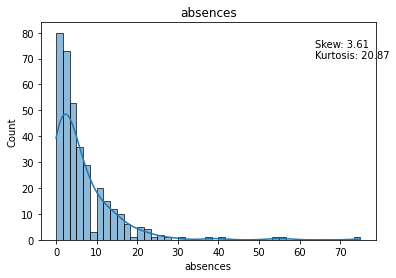

In [13]:
for num_col in numerical:
  sns.histplot(df[num_col], element='bars',kde=True)
  plt.text(x=np.max(df[num_col])*0.85,y=70,s=f"Skew: {round(df[num_col].skew(),2)}\nKurtosis: {round(df[num_col].kurt(),2)}")
  plt.title(num_col)
  plt.show()

pairplot

<Figure size 1440x1440 with 0 Axes>

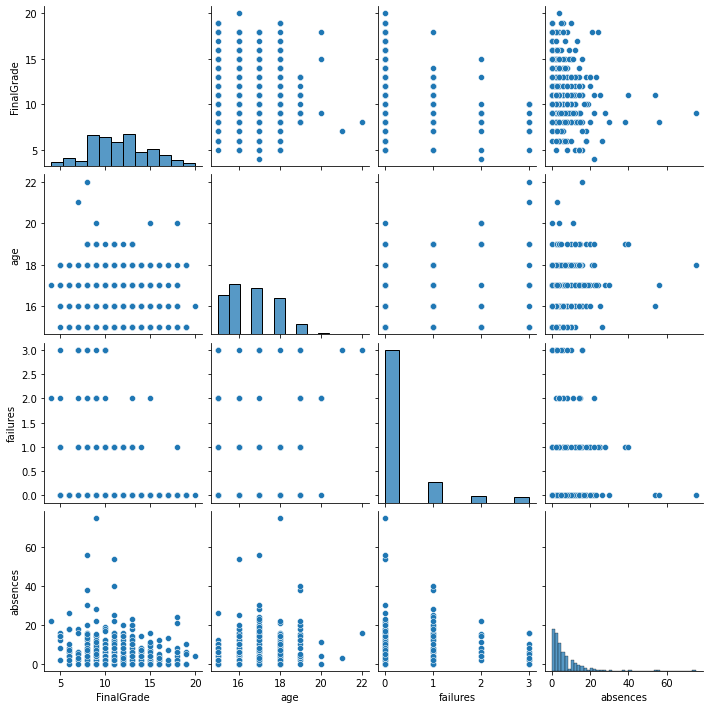

In [14]:
num_and_target = [target]
num_and_target.extend(numerical)

plt.figure(figsize=(20,20))
sns.pairplot(data=df[num_and_target])
plt.show()

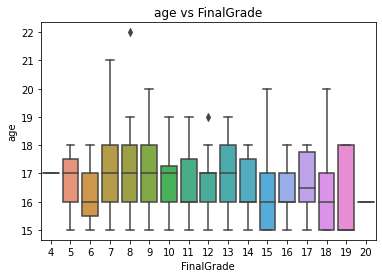

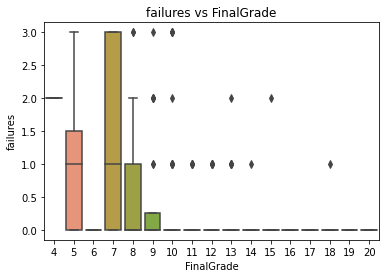

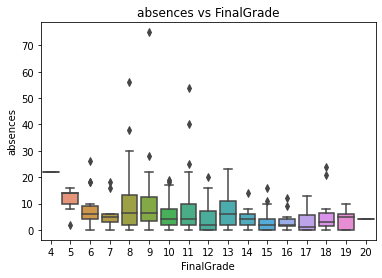

In [15]:
for num_col in numerical:
    sns.boxplot(y=df[num_col], x=df[target])
    plt.title(f"{num_col} vs FinalGrade")
    plt.show()

#### Categorical Features

In [16]:
school_col = ['school', 'reason','nursery']
identity_col = ['sex','health']
home_col = ['address','traveltime','internet']
party_col = ['freetime', 'goout', 'Dalc', 'Walc']
relation_col = ['romantic','famrel']
student_col = ['studytime','activities','higher']
support_col = ['schoolsup', 'famsup', 'paid']
family_col = ['guardian','famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob']

##### Encode Categorical Columns (OPT)

In [17]:
categorical_col = df.select_dtypes(include=['object']).columns
assert categorical_col.all() in categorical
print(categorical_col)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


In [18]:
from sklearn.preprocessing import OrdinalEncoder

df_cat = df.copy()

ord_enc = OrdinalEncoder(dtype=int)
for c in categorical_col :
  df_cat[c] = ord_enc.fit_transform(df_cat[[c]])

assert len(df_cat.select_dtypes(include=['int']).columns) == len(df.columns)

df_cat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade
0,0,0,18,1,0,0,4,4,0,4,...,0,0,4,3,4,1,1,3,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,0,5,3,3,1,1,3,4,6
2,0,0,15,1,1,1,1,1,0,2,...,1,0,4,3,2,2,3,3,10,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,3,2,2,1,1,5,2,15
4,0,0,16,1,0,1,3,3,2,2,...,0,0,4,3,2,1,2,5,4,10


##### Categorical vs Target

Final Grade vs School columns

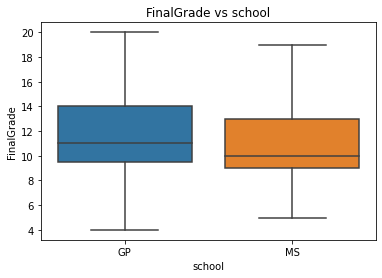

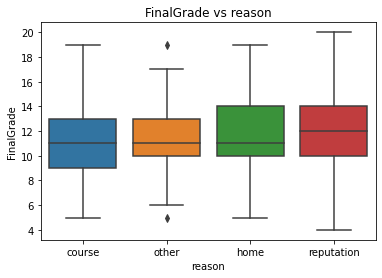

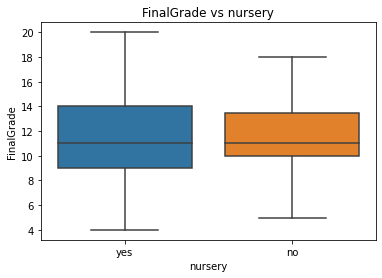

In [19]:
for cat_col in school_col:
    sns.boxplot(y=df[target], x=df[cat_col])
    plt.title(f"FinalGrade vs {cat_col}")
    plt.show()

FinalGrade vs Identity Columns

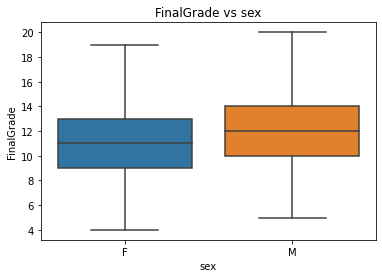

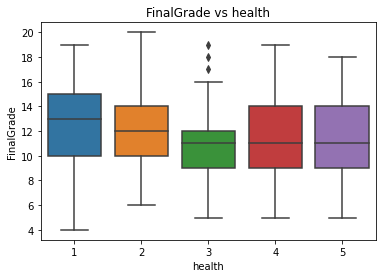

In [20]:
for cat_col in identity_col:
    sns.boxplot(y=df[target], x=df[cat_col])
    plt.title(f"FinalGrade vs {cat_col}")
    plt.show()

FinalGrade vs Home Columns

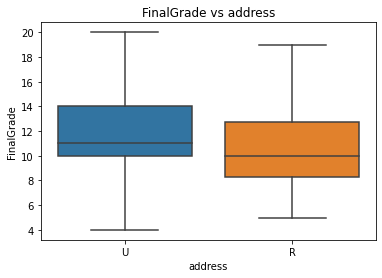

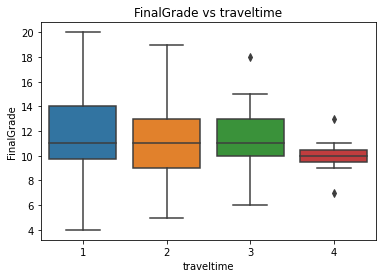

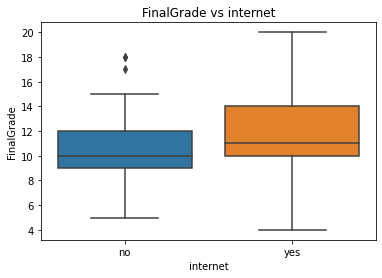

In [21]:
for cat_col in home_col:
    sns.boxplot(y=df[target], x=df[cat_col])
    plt.title(f"FinalGrade vs {cat_col}")
    plt.show()

FinalGrade vs Party Columns

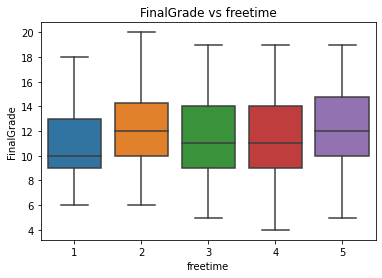

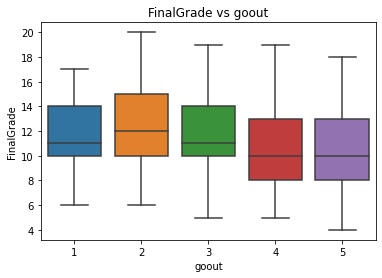

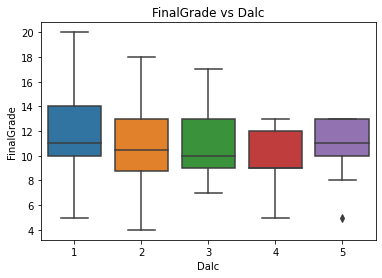

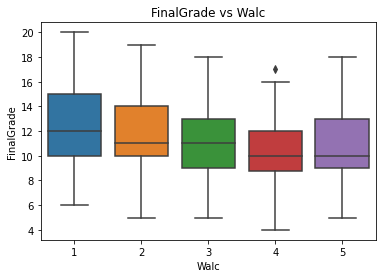

In [22]:
for cat_col in party_col:
    sns.boxplot(y=df[target], x=df[cat_col])
    plt.title(f"FinalGrade vs {cat_col}")
    plt.show()

FinalGrade vs Relation Columns

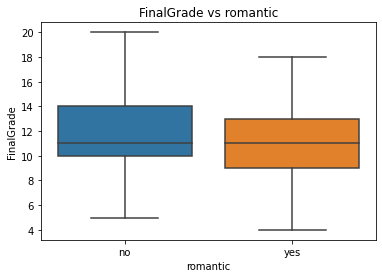

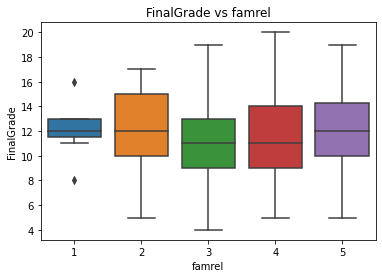

In [23]:
for cat_col in relation_col:
    sns.boxplot(y=df[target], x=df[cat_col])
    plt.title(f"FinalGrade vs {cat_col}")
    plt.show()

FinalGrade vs Student Life Columns

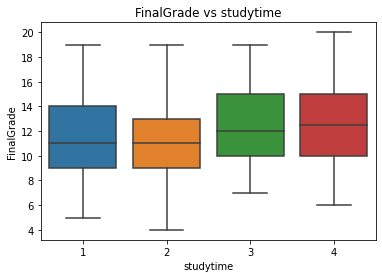

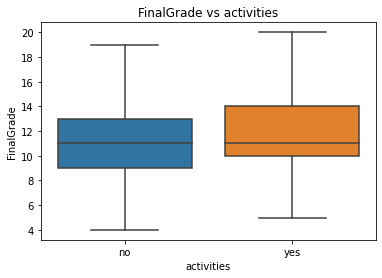

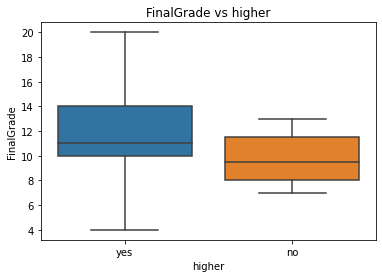

In [24]:
for cat_col in student_col:
    sns.boxplot(y=df[target], x=df[cat_col])
    plt.title(f"FinalGrade vs {cat_col}")
    plt.show()

FinalGrade vs Study Support Columns

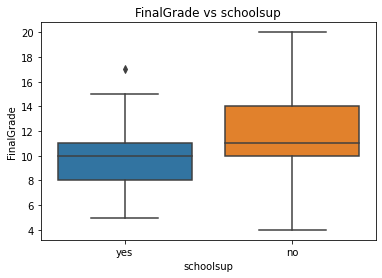

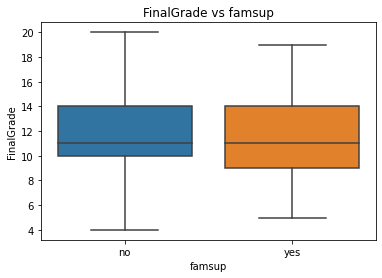

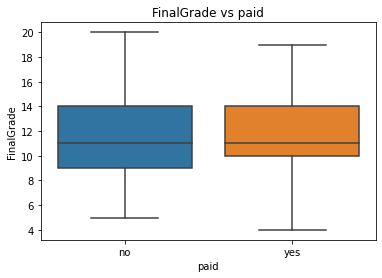

In [25]:
for cat_col in support_col:
    sns.boxplot(y=df[target], x=df[cat_col])
    plt.title(f"FinalGrade vs {cat_col}")
    plt.show()

FinalGrade vs Family Situation Columns

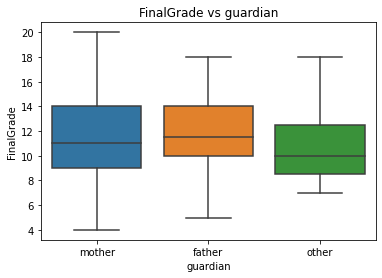

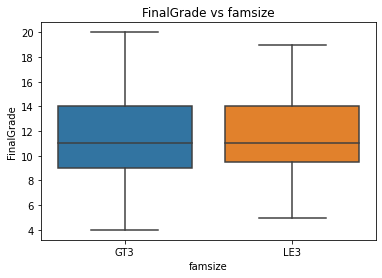

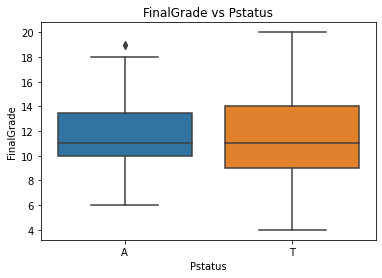

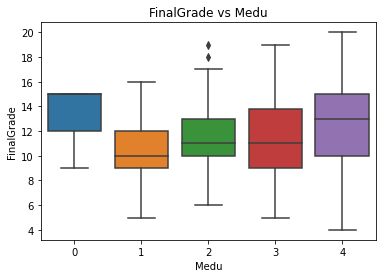

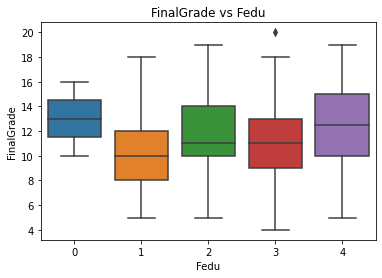

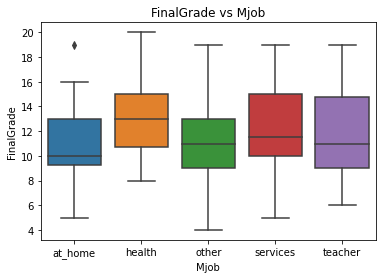

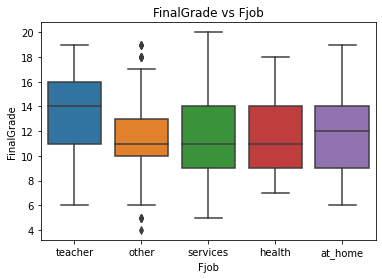

In [26]:
for cat_col in family_col:
    sns.boxplot(y=df[target], x=df[cat_col])
    plt.title(f"FinalGrade vs {cat_col}")
    plt.show()

#### Target : FinalGrade

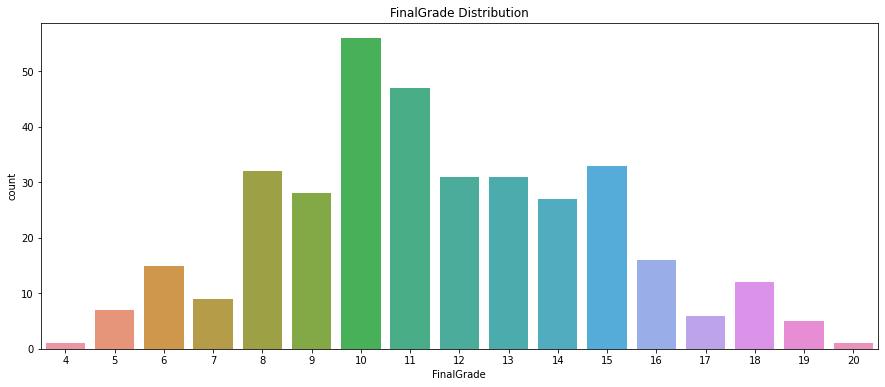

In [27]:
plt.figure(figsize=(15,6))
plt.title("FinalGrade Distribution")
sns.countplot(x=target, data=df)
plt.show()

In [28]:
print(len(df[df[target] < 8]))
print(len(df[df[target] >= 12][df[target] < 16]))
print(len(df[df[target] >= 16]))

32
122
40


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


**On va categoriser le label selon 5 groupes :**  
- 1  < 8 : 32 lines
- 2  >= 8 et < 10 : 60 lines
- 3  >= 10 et < 12 : 103 lines
- 4  >= 12 et < 16 : 122 lines
- 5  >= 16 : 40 lines



Encoding of the FinalGrade

In [29]:
def encode_target_5_cat(final_grade:int) -> int:
  if final_grade < 8:
    return 1
  elif final_grade >=8 and final_grade < 10:
    return 2
  elif final_grade >= 10 and final_grade < 12:
    return 3
  elif final_grade >= 12 and final_grade < 16:
    return 4
  elif final_grade >=16 :
    return 5


In [30]:
df["Target5Class"] = df_cat["FinalGrade"].apply(encode_target_5_cat)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade,Target5Class
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,10,3
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,4
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,10,3


Multiclasse distribution

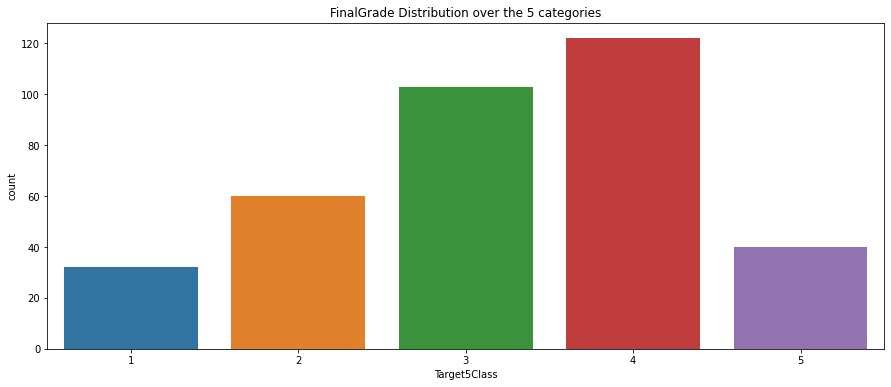

In [31]:
plt.figure(figsize=(15,6))
plt.title("FinalGrade Distribution over the 5 categories")
sns.countplot(x="Target5Class", data=df)
plt.show()

## Data Preprocessing

In [32]:
actionable_cols = []

In [33]:
y1 = df['Target5Class']
y2 = df['FinalGrade']
X = df.drop(['Target5Class','FinalGrade'],axis=1)

### Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train1, y_test1 = train_test_split(X, y1, test_size = 0.2)
X_train, X_test, y_train2, y_test2 = train_test_split(X, y2, test_size = 0.2)

### Transformation

In [35]:
num_cols = X_train.dtypes[X_train.dtypes=='int'].index.to_list()
num_cols

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

Categorical Columns

In [36]:
cat_cols = X_train.dtypes[X_train.dtypes=='O'].index.to_list()
cat_cols

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

Select Actionable Columns

In [37]:
actionable

['school',
 'studytime',
 'famsup',
 'paid',
 'activities',
 'internet',
 'romantic',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health']

In [38]:
#num_cols = [col for col in num_cols if col in actionable]
#num_cols

In [39]:
#cat_cols = [col for col in cat_cols if col in actionable]
#cat_cols

In [40]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_cols)

], remainder='drop')

In [41]:
ct.fit_transform(X_train).shape

(285, 56)

## Create Model Pipeline

In [42]:
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor,LGBMClassifier

pipe_clf = Pipeline([
    ("trf", ct),
    ("model", LGBMClassifier(random_state=0))   
])

pipe_rgs = Pipeline([
    ("trf", ct),
    ("model", LGBMRegressor(random_state=0))   
])

In [43]:
params = {
    'model__n_estimators':[100,130,150,170,190],
    'model__boosting_type': ['dart', 'gbdt', 'goss']
}

In [44]:
from sklearn.model_selection import GridSearchCV

gs_clf = GridSearchCV(pipe_clf, param_grid=params, scoring='neg_root_mean_squared_error', n_jobs=-1)
gs_rgs = GridSearchCV(pipe_rgs, param_grid=params, scoring='neg_root_mean_squared_error', n_jobs=-1)

### Fit Models

In [45]:
gs_clf.fit(X_train,y_train1)

GridSearchCV(estimator=Pipeline(steps=[('trf',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'Medu',
                                                                          'Fedu',
                                                                          'traveltime',
                                                                          'studytime',
                                                                          'failures',
                                                                          'famrel',
                                                                          'freetime',
                                                                          'goout',
                       

In [46]:
gs_rgs.fit(X_train,y_train2)

GridSearchCV(estimator=Pipeline(steps=[('trf',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'Medu',
                                                                          'Fedu',
                                                                          'traveltime',
                                                                          'studytime',
                                                                          'failures',
                                                                          'famrel',
                                                                          'freetime',
                                                                          'goout',
                       

### Rank Models

In [47]:
pd.DataFrame(gs_clf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__boosting_type,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,0.096198,0.005420,0.012607,0.000375,goss,100,"{'model__boosting_type': 'goss', 'model__n_est...",-1.420403,-1.420403,-1.297771,-1.357242,-1.350763,-1.369316,0.046537,1
13,0.135040,0.004787,0.014440,0.003307,goss,170,"{'model__boosting_type': 'goss', 'model__n_est...",-1.538968,-1.331139,-1.426565,-1.331139,-1.277333,-1.381028,0.092465,2
11,0.117607,0.006859,0.012977,0.000228,goss,130,"{'model__boosting_type': 'goss', 'model__n_est...",-1.462994,-1.450953,-1.407997,-1.426565,-1.256562,-1.401014,0.074704,3
12,0.122080,0.006326,0.013219,0.000429,goss,150,"{'model__boosting_type': 'goss', 'model__n_est...",-1.550325,-1.382852,-1.414214,-1.407997,-1.277333,-1.406544,0.087167,4
0,0.240931,0.020908,0.014678,0.002146,dart,100,"{'model__boosting_type': 'dart', 'model__n_est...",-1.456986,-1.401753,-1.450953,-1.344254,-1.401753,-1.411140,0.040834,5


In [48]:
pd.DataFrame(gs_rgs.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__boosting_type,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.121161,0.008265,0.012491,0.000556,dart,190,"{'model__boosting_type': 'dart', 'model__n_est...",-3.357671,-3.563958,-3.111605,-3.269667,-2.892326,-3.239045,0.226730,1
2,0.102533,0.003802,0.015206,0.006185,dart,150,"{'model__boosting_type': 'dart', 'model__n_est...",-3.375702,-3.624179,-3.193280,-3.320591,-2.803205,-3.263392,0.269347,2
5,0.053022,0.004191,0.012361,0.000615,gbdt,100,"{'model__boosting_type': 'gbdt', 'model__n_est...",-3.508779,-3.499186,-3.150515,-3.128125,-3.241887,-3.305698,0.166352,3
3,0.109655,0.007382,0.012167,0.000473,dart,170,"{'model__boosting_type': 'dart', 'model__n_est...",-3.382647,-3.674901,-3.263596,-3.422539,-2.789580,-3.306652,0.291215,4
1,0.085802,0.006241,0.012500,0.000790,dart,130,"{'model__boosting_type': 'dart', 'model__n_est...",-3.429264,-3.689221,-3.248758,-3.404838,-2.801270,-3.314670,0.293078,5


### Model Best Params

In [49]:
gs_clf.best_params_

{'model__boosting_type': 'goss', 'model__n_estimators': 100}

In [50]:
gs_rgs.best_params_

{'model__boosting_type': 'dart', 'model__n_estimators': 190}

### Model Best Score

In [51]:
gs_clf.best_score_

-1.3693163683781202

In [52]:
gs_rgs.best_score_

-3.2390452030748285

## Save Best Model

In [53]:
gs_clf.best_estimator_

Pipeline(steps=[('trf',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absences']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Mjob',
                                                   'Fjob', 'reason', 'guardia

In [54]:
gs_rgs.best_estimator_

Pipeline(steps=[('trf',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absences']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Mjob',
                                                   'Fjob', 'reason', 'guardia

In [55]:
# save into file
import joblib

filename_clf = os.path.join(main_folder,'clf_model.joblib')
joblib.dump(gs_clf.best_estimator_, open(filename_clf, 'wb'))

In [56]:
filename_rgs = os.path.join(main_folder,'rgs_model.joblib')
joblib.dump(gs_rgs.best_estimator_, open(filename_rgs, 'wb'))

## Import Model

In [57]:
# load the model from disk
loaded_clf_model = joblib.load(open(filename_clf, 'rb'))
loaded_rgs_model = joblib.load(open(filename_rgs, 'rb'))

## Predict

In [71]:
y_pred_clf = loaded_clf_model.predict(X_test)
y_pred_clf

array([2, 4, 4, 4, 3, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 2, 4, 3, 4,
       4, 5, 2, 3, 2, 3, 2, 4, 3, 4, 4, 4, 5, 3, 4, 2, 2, 3, 4, 4, 2, 4,
       2, 4, 4, 1, 3, 3, 3, 3, 4, 3, 4, 3, 3, 4, 2, 3, 4, 2, 3, 2, 2, 4,
       4, 5, 4, 4, 3, 3])

In [72]:
y_pred_rgs = np.round(loaded_rgs_model.predict(X_test),0)
y_pred_rgs

array([14.,  8., 11., 12., 10.,  8.,  9., 10., 11., 10., 11., 15., 12.,
        9., 11., 13.,  8., 11., 13., 13., 13., 11., 14., 10., 10., 11.,
       11., 11., 12., 11., 13., 11., 12., 14.,  9., 11., 14., 13.,  9.,
        8., 12., 13., 13., 11., 13., 11., 11., 13., 13., 13., 13., 14.,
       10., 12., 12., 11., 11., 12., 10., 10.,  9., 10., 10., 11., 12.,
       11., 13.,  8.,  9., 12.,  9., 13.])

## Evaluate

In [73]:
from sklearn.metrics import accuracy_score, mean_squared_error

print(f"Classifier Evaluation {accuracy_score(y_test1,y_pred_clf)}")
print(f"Regressor Evaluation {mean_squared_error(y_test2,y_pred_rgs)}")

Classifier Evaluation 0.25
Regressor Evaluation 5.916666666666667


### New Student

In [74]:
# new_student_value = X.iloc[0].to_list()

new_student_value = ['GP', 'M', 18, 'U', 'GT3', 'A', 4, 4, 'at_home', 'teacher',
 'course', 'father', 2, 2, 0, 'no', 'no', 'no', 'yes', 'yes', 'yes',
 'no', 'no', 4, 3, 4, 1, 1, 2, 12]

In [75]:
new_student = pd.DataFrame([new_student_value],columns = X.columns)
new_student

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,M,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,2,12


In [76]:
result_clf = loaded_clf_model.predict(new_student)
print(result_clf)

[3]


In [77]:
result_rgs = np.round(loaded_rgs_model.predict(new_student),0)
print(result_rgs)

[12.]
